In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
wine=pd.read_csv('D:/s/mldll/ml dataset/winequalityN.csv')

In [75]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [76]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_5448\2259804608.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['alcohol'],bins=5).set_title('Distribution of alcohol')
C:\Users\user\AppData\Local\Temp\ipykernel_5448\2259804608.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['density

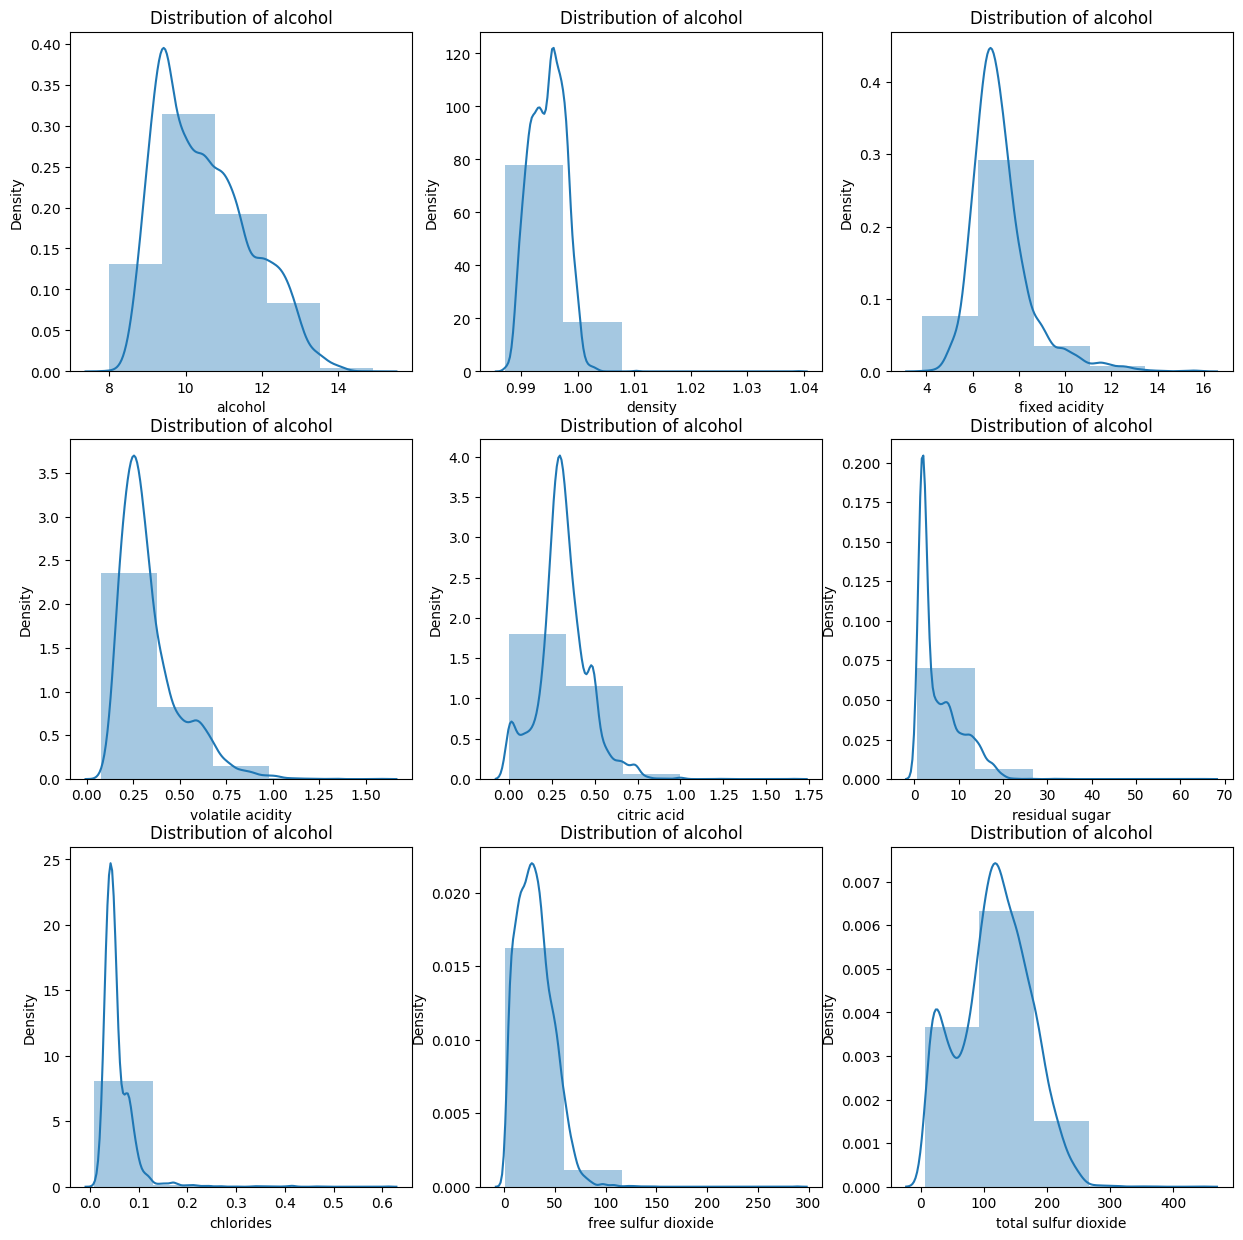

In [77]:
plt.figure(1,figsize=(15,15))
plt.subplot(331)
sns.distplot(wine['alcohol'],bins=5).set_title('Distribution of alcohol')
plt.subplot(332)
sns.distplot(wine['density'],bins=5).set_title('Distribution of alcohol')
plt.subplot(333)
sns.distplot(wine['fixed acidity'],bins=5).set_title('Distribution of alcohol')
plt.subplot(334)
sns.distplot(wine['volatile acidity'],bins=5).set_title('Distribution of alcohol')
plt.subplot(335)
sns.distplot(wine['citric acid'],bins=5).set_title('Distribution of alcohol')
plt.subplot(336)
sns.distplot(wine['residual sugar'],bins=5).set_title('Distribution of alcohol')
plt.subplot(337)
sns.distplot(wine['chlorides'],bins=5).set_title('Distribution of alcohol')
plt.subplot(338)
sns.distplot(wine['free sulfur dioxide'],bins=5).set_title('Distribution of alcohol')
plt.subplot(339)
sns.distplot(wine['total sulfur dioxide'],bins=5).set_title('Distribution of alcohol')
plt.show()


<Axes: ylabel='Frequency'>

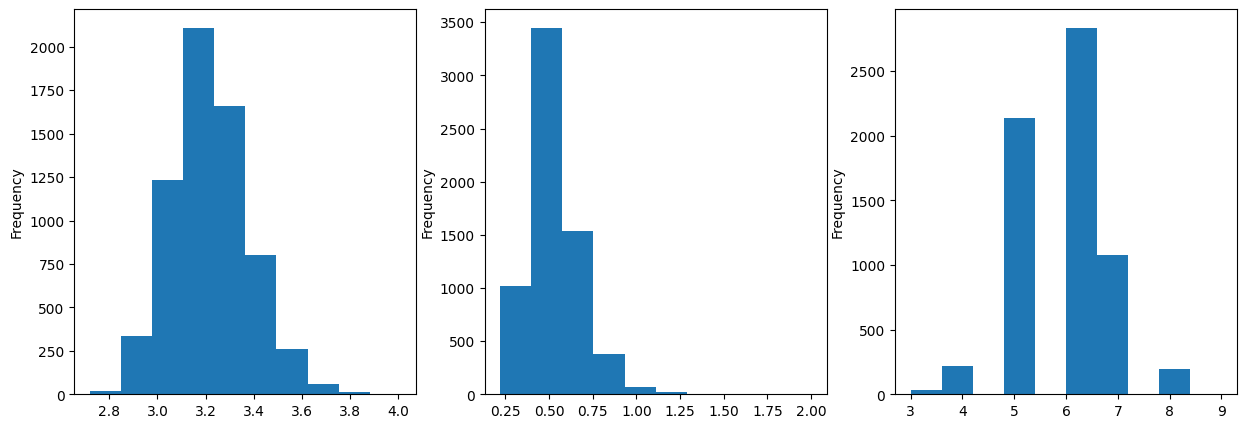

In [78]:
plt.figure(2,figsize=(15,5))
plt.subplot(131)
wine['pH'].plot.hist(bins=10)
plt.subplot(132)
wine['sulphates'].plot.hist(bins=10)
plt.subplot(133)
wine['quality'].plot.hist(bins=10)

C:\Users\user\AppData\Local\Temp\ipykernel_5448\2734685488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(),annot=True,cmap='YlGnBu')


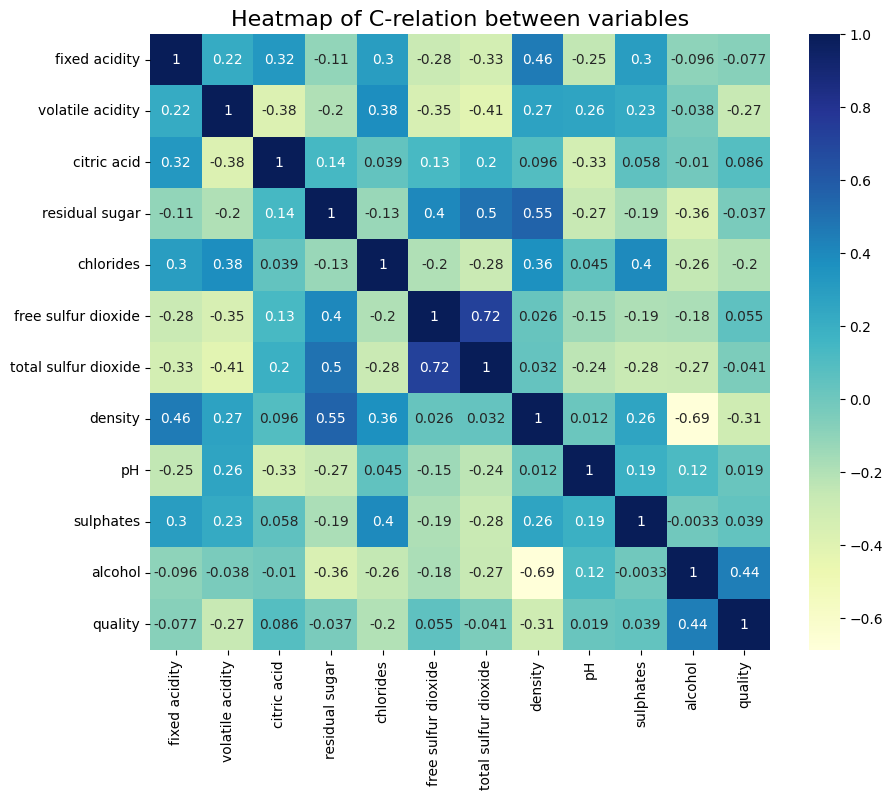

In [79]:
sns.heatmap(wine.corr(),annot=True,cmap='YlGnBu')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title("Heatmap of C-relation between variables",fontsize=16)
plt.show()

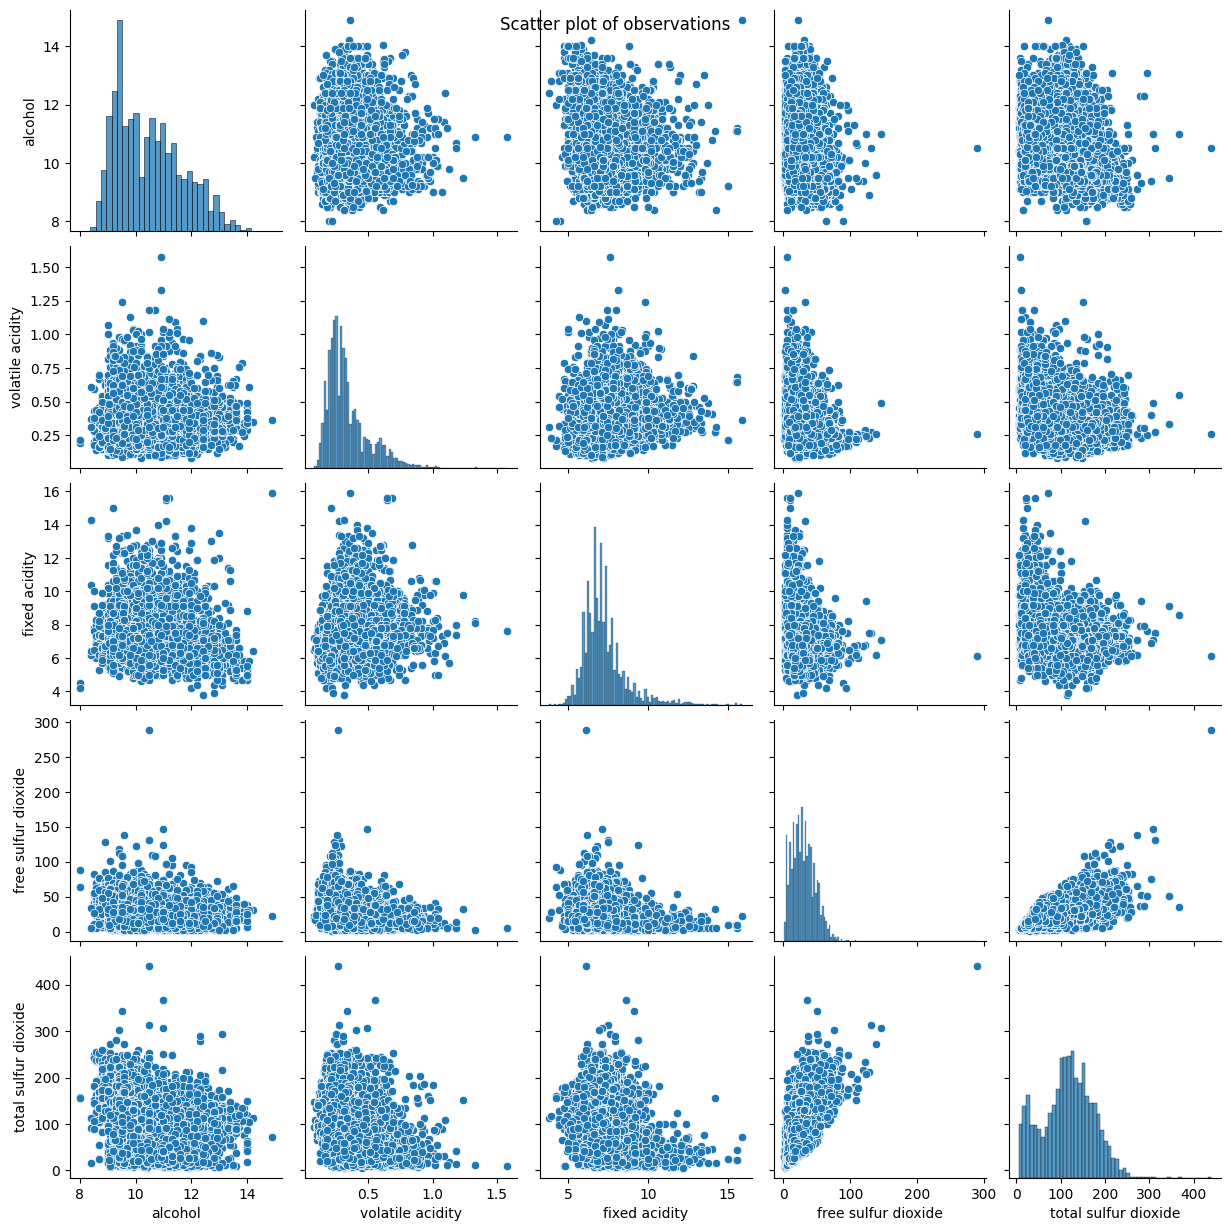

In [80]:
sns.pairplot(wine[['alcohol','volatile acidity','fixed acidity','free sulfur dioxide','total sulfur dioxide']])
plt.suptitle("Scatter plot of observations")
plt.show()

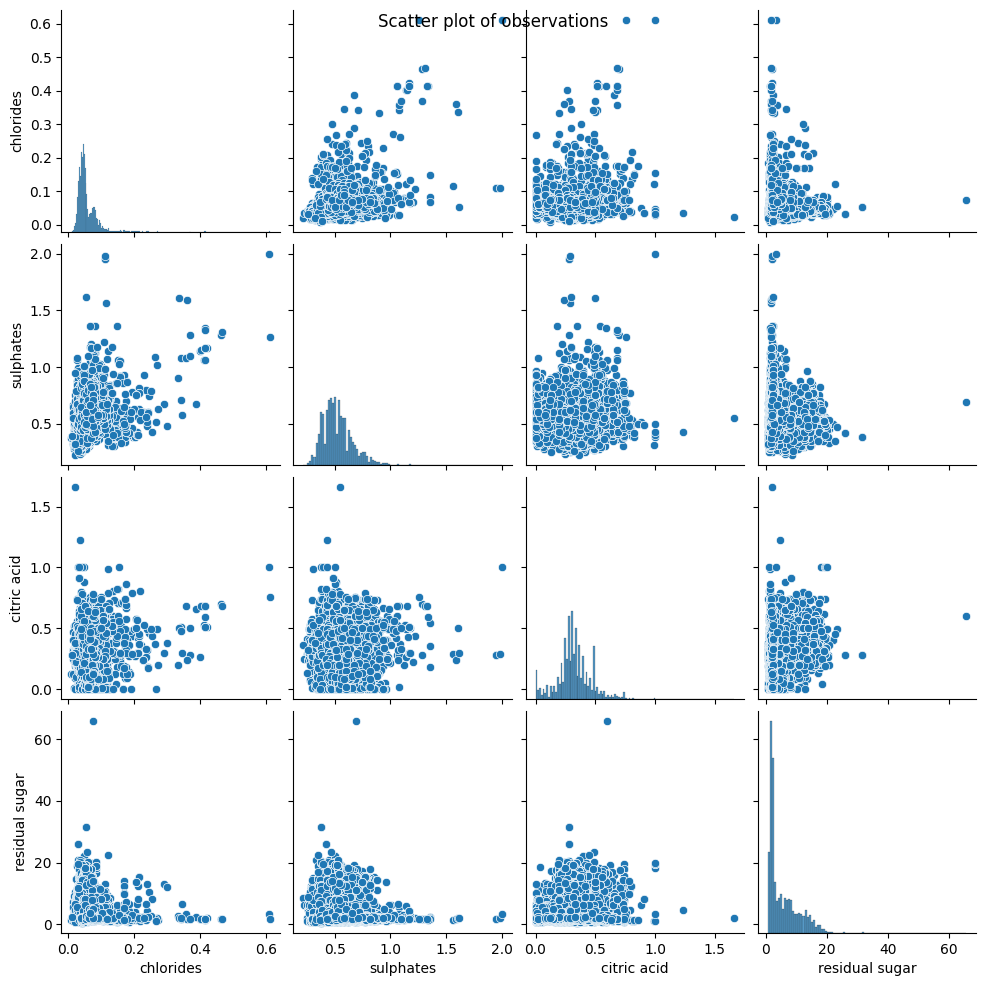

In [81]:
sns.pairplot(wine[['chlorides','sulphates','citric acid','residual sugar']])
plt.suptitle("Scatter plot of observations")
plt.show()

In [82]:
wine.dropna(inplace=True)

In [83]:
wi=wine.drop('type',axis=1)

In [84]:
from scipy import stats
stats.skew(wi)

array([ 1.72124846e+00,  1.49969230e+00,  4.74797264e-01,  1.43679204e+00,
        5.40217823e+00,  1.22314279e+00, -4.25350757e-04,  5.04087302e-01,
        3.91002891e-01,  1.80252255e+00,  5.65303998e-01,  1.89833721e-01])

In [85]:
stats.kurtosis(wi)

array([ 5.0439598 ,  2.84253158,  2.41413271,  4.38027943, 50.85790306,
        7.92505324, -0.37033036,  6.60857876,  0.37722289,  8.67137165,
       -0.53318811,  0.2320139 ])

In [86]:
zscore=np.abs(stats.zscore(wi))
zscore

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.167786,0.422710,0.283959,3.207420,0.315228,0.815609,0.960779,2.099926,1.359160,0.544987,1.418922,0.207846
1,0.707155,0.240479,0.146257,0.808151,0.201180,0.930138,0.288479,0.232465,0.508399,0.276354,0.832184,0.207846
2,0.679794,0.361966,0.559363,0.306117,0.172668,0.029107,0.330745,0.134053,0.259391,0.612146,0.329265,0.207846
3,0.013681,0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,0.176373,0.880779,0.496905,0.207846
4,0.013681,0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,0.176373,0.880779,0.496905,0.207846
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.321892,1.703315,1.643871,0.745079,0.340545,0.141736,1.374580,0.603864,1.255423,1.939871,0.832184,0.207846
6492,0.784208,1.581828,1.643871,0.724055,0.967807,0.083522,1.268427,0.067414,1.442179,0.328071,0.006014,0.937343
6494,0.707155,1.035136,1.299616,0.660984,0.568640,0.085421,1.339195,0.347301,1.255423,1.469762,0.425113,0.207846
6495,1.015366,1.855174,1.368467,0.724055,0.540129,0.083522,1.268427,0.257337,2.189203,1.201129,0.245446,0.937343


In [87]:
outlierlist = np.where(zscore>3)
outlierlist[0]

array([   0,    7,   38,   39,  175,  184,  187,  188,  189,  200,  241,
        242,  244,  281,  283,  314,  314,  360,  383,  393,  430,  431,
        470,  515,  583,  641,  665,  669,  710,  721,  726,  754,  799,
        806,  809,  813,  838,  852,  855,  924, 1011, 1011, 1028, 1134,
       1139, 1193, 1205, 1226, 1231, 1233, 1248, 1345, 1361, 1393, 1393,
       1430, 1452, 1460, 1502, 1527, 1574, 1575, 1581, 1584, 1614, 1629,
       1629, 1639, 1639, 1657, 1664, 1664, 1698, 1751, 1811, 1818, 1832,
       1841, 1876, 1901, 1902, 1907, 1907, 1907, 1927, 2000, 2002, 2012,
       2026, 2026, 2103, 2130, 2162, 2162, 2297, 2310, 2312, 2325, 2349,
       2379, 2417, 2441, 2442, 2465, 2468, 2551, 2596, 2601, 2630, 2644,
       2680, 2681, 2687, 2704, 2711, 2724, 2726, 2747, 2757, 2757, 2757,
       2761, 2763, 2796, 2825, 2848, 2850, 2869, 2938, 2988, 2997, 2999,
       3017, 3024, 3038, 3040, 3046, 3061, 3126, 3126, 3239, 3257, 3262,
       3281, 3281, 3353, 3361, 3383, 3394, 3435, 34

In [88]:
winedata_df_n = wi[(zscore<3).all(axis=1)]
winedata_df_n.shape

(5955, 12)

In [89]:
x=wi.drop('quality',axis=1)
y=wi['quality']

In [90]:
winedatatarget_df_n=wi[(zscore<3).all(axis=1)]
winedatatarget_df_n.shape

(5955, 12)

In [97]:
winey=wi['quality']

In [98]:
winetarget=winey.drop(index=outlierlist[0])
winetarget.shape

(5955,)

In [99]:
train_x, test_x , train_y , test_y = train_test_split(winedata_df_n,winetarget,random_state=0)

In [100]:
winedata_df_n

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [101]:
winetarget

1       6
2       6
3       6
4       6
5       6
       ..
6491    6
6492    5
6494    6
6495    5
6496    6
Name: quality, Length: 5955, dtype: int64

In [102]:
wine_model = LogisticRegression()

In [103]:
wine_model.fit(train_x,train_y)

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
wine_model.score(train_x,train_y)

0.493282579489476

In [105]:
pred = wine_model.predict(test_x)

In [106]:
confusion_matrix(test_y,pred)

array([[  0,   0,   0,   4,   0,   0,   0],
       [  0,   0,  22,  22,   0,   0,   0],
       [  0,   0, 199, 291,   6,   0,   0],
       [  0,   0, 112, 522,   3,   0,   0],
       [  0,   0,  43, 212,   6,   0,   0],
       [  0,   0,   5,  35,   6,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)